In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

### Data loading and cleaning

In [38]:
# loading data
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [39]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [40]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [41]:
# converting TotalCharges from object to numeric
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [42]:
# checking for null values
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [43]:
# dropping the null values
churnData.dropna(inplace=True)

In [44]:
churnData['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [45]:
# converting Churn into binary
churnData['Churn'] = list(map(lambda x:0 if x=='No' else 1, churnData['Churn']))

### Modelling

In [46]:
# X, y split
X = churnData[['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']]
y = churnData['Churn']

In [47]:
# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.66,0.63
2,Recall,0.46,0.45


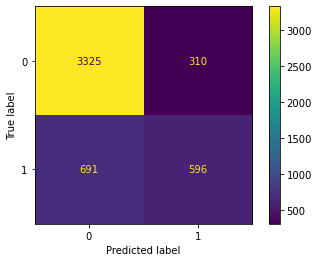

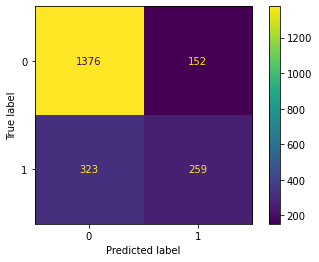

In [48]:
# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(X_train)

X_train_mod = std_scaler.transform(X_train)
X_test_mod  = std_scaler.transform(X_test)

log = LogisticRegression() 

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN

In [49]:
# model evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# initialize model (set parameters)
neigh = KNeighborsClassifier(n_neighbors=10)

In [51]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,0.20,0.22
1,Mean absolute error,0.32,0.41
2,Mean squared error,0.54,0.70
3,Root mean squared error,0.74,0.84
4,Mean absolute percentual error,15.23,20.91
5,R2,0.05,-0.19


In [53]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,0.24,0.26
1,2,Mean absolute error,0.24,0.43
2,2,Mean squared error,0.42,0.75
3,2,Root mean squared error,0.64,0.86
4,2,Mean absolute percentual error,8.94,21.32
...,...,...,...,...
1,20,Mean absolute error,0.34,0.40
2,20,Mean squared error,0.58,0.69
3,20,Root mean squared error,0.76,0.83
4,20,Mean absolute percentual error,16.52,20.18


In [54]:
# checking for overfitting
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.27,-0.26
5,3,R2,0.28,-0.28
5,4,R2,0.14,-0.20
5,5,R2,0.12,-0.22
5,6,R2,0.07,-0.18
5,7,R2,0.08,-0.20
5,8,R2,0.06,-0.18
5,9,R2,0.06,-0.18
5,10,R2,0.05,-0.19
5,11,R2,0.03,-0.18


In [55]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,0.24
1,2,Mean absolute error,Train,0.24
2,2,Mean squared error,Train,0.42
3,2,Root mean squared error,Train,0.64
4,2,Mean absolute percentual error,Train,8.94
...,...,...,...,...
223,20,Mean absolute error,Test,0.40
224,20,Mean squared error,Test,0.69
225,20,Root mean squared error,Test,0.83
226,20,Mean absolute percentual error,Test,20.18


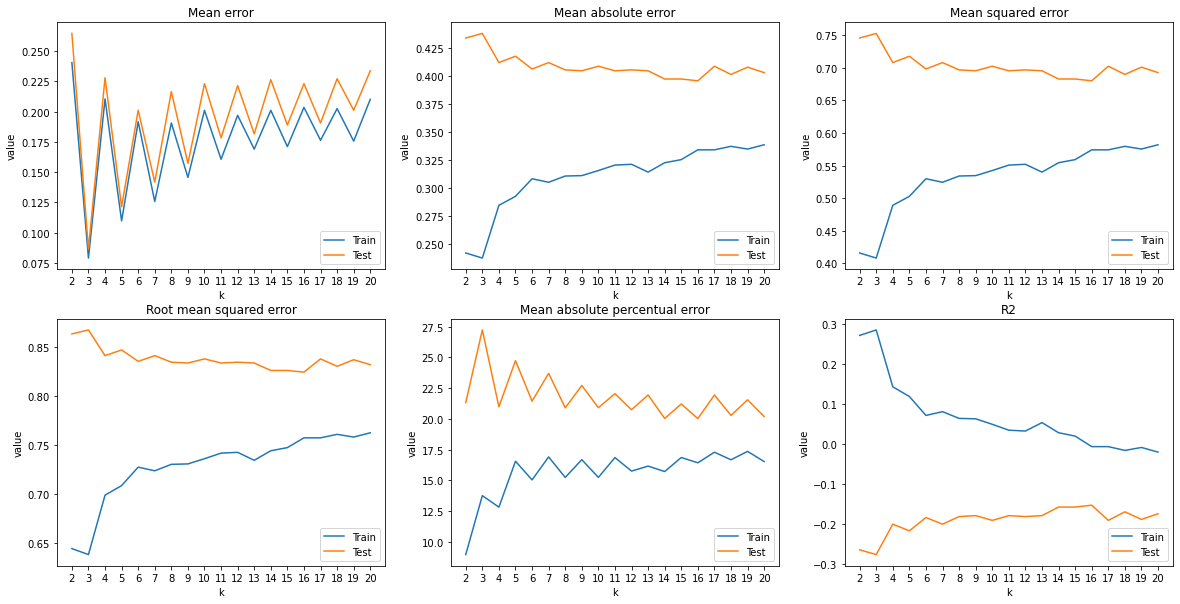

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')